In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Lets load both training and Testing Data

In [2]:
train_df =pd.read_csv("Data.csv")
train_df = train_df.drop(['Instance'], axis=1)
test_df = pd.read_csv("tcdml2019-20incomepredictiontest(without labels).csv")


# Lets describe the training data and we see that there are negative incomes and few outliers. We can get rid of those rows

In [3]:
train_df.describe()
train_df = train_df[(train_df['Income in EUR'] > 0) & (train_df['Income in EUR'] <2000000)]

In [4]:
train_df.describe()

,Year of Record,Age,Size of City,Wears Glasses,Body Height [cm],Income in EUR
count,111368.000000,111315.000000,1.118080e+05,111808.000000,111808.000000,1.118080e+05
mean,1999.417364,37.361586,8.400275e+05,0.500483,175.240126,1.089758e+05
std,11.574863,16.031955,2.198466e+06,0.500002,19.907656,1.463428e+05
min,1980.000000,14.000000,7.700000e+01,0.000000,94.000000,6.113263e+00
25%,1989.000000,24.000000,7.294850e+04,0.000000,160.000000,3.085128e+04
50%,1999.000000,35.000000,5.079235e+05,1.000000,174.000000,5.743879e+04
75%,2009.000000,48.000000,1.185769e+06,1.000000,190.000000,1.262342e+05
max,2019.000000,115.000000,4.999251e+07,1.000000,265.000000,1.992121e+06


# Time to do data cleaning as there are rows which are missing in dataset

In [5]:
print ('Missing data in each Titanic dataframe column:')
for c in train_df.columns:
    missing_data = len(train_df) - train_df[c].count()
    if (missing_data > 0 or missing_data =='NaN'):
        print (c, ':', missing_data, 'missing values is', str(round(float(missing_data / float(len(train_df))) *  100, 3)), '% of total')
        

Missing data in each Titanic dataframe column:
Year of Record : 440 missing values is 0.394 % of total
Gender : 7385 missing values is 6.605 % of total
Age : 493 missing values is 0.441 % of total
Profession : 321 missing values is 0.287 % of total
University Degree : 7348 missing values is 6.572 % of total
Hair Color : 7228 missing values is 6.465 % of total


In [6]:
train_df.count()

Year of Record       111368
Gender               104423
Age                  111315
Country              111808
Size of City         111808
Profession           111487
University Degree    104460
Wears Glasses        111808
Hair Color           104580
Body Height [cm]     111808
Income in EUR        111808
dtype: int64

In [538]:
train_df.isnull().sum()

Year of Record        435
Gender               7353
Age                     0
Country                 0
Size of City            0
Profession            320
University Degree    7268
Wears Glasses           0
Hair Color           7164
Body Height [cm]        0
Income in EUR           0
dtype: int64

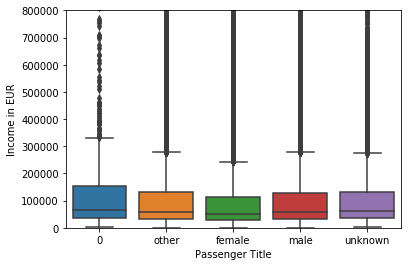

In [7]:
import seaborn as sns
sns.boxplot(x='Gender', y='Income in EUR', data=train_df)
plt.xlabel('Passenger Title')
plt.ylabel('Income in EUR')
plt.ylim([0,800000])
plt.show()

In [8]:
numeric_features = train_df.select_dtypes(include=[np.number])
numeric_features.dtypes

Year of Record      float64
Age                 float64
Size of City          int64
Wears Glasses         int64
Body Height [cm]      int64
Income in EUR       float64
dtype: object

In [9]:
print(train_df.describe(include=['number']).loc[['min','max','mean']].T.sort_values('max'))

                          min           max           mean
Wears Glasses        0.000000  1.000000e+00       0.500483
Age                 14.000000  1.150000e+02      37.361586
Body Height [cm]    94.000000  2.650000e+02     175.240126
Year of Record    1980.000000  2.019000e+03    1999.417364
Income in EUR        6.113263  1.992121e+06  108975.823830
Size of City        77.000000  4.999251e+07  840027.458500


# Since we don't get much info from plots(few plots have been taken off from this notebook). we tried to set-up correlation among variables.

In [10]:
corr = numeric_features.corr()

print (corr['Income in EUR'].sort_values(ascending=False)[:5], '\n')
print (corr['Income in EUR'].sort_values(ascending=False)[-5:])

Income in EUR       1.000000
Age                 0.186083
Year of Record      0.166633
Body Height [cm]    0.072460
Size of City        0.015029
Name: Income in EUR, dtype: float64 

Age                 0.186083
Year of Record      0.166633
Body Height [cm]    0.072460
Size of City        0.015029
Wears Glasses       0.005610
Name: Income in EUR, dtype: float64


In [18]:
Corr_df = train_df[['Income in EUR','Age','Year of Record', 'Body Height [cm]', 'Size of City','Wears Glasses']]

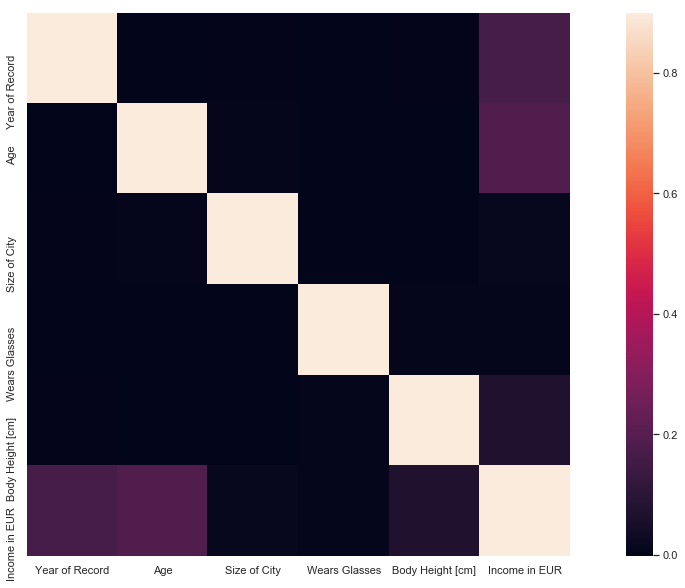

In [20]:
corrmat = train_df.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, vmax=.9, square=True)

In [21]:
categoricals = train_df.select_dtypes(exclude=[np.number])
categoricals.describe()

,Gender,Country,Profession,University Degree,Hair Color
count,104423,111808,111487,104460,104580
unique,5,158,1340,5,6
top,male,Switzerland,pipefitter,Bachelor,Black
freq,42730,2302,261,43112,42715


In [22]:
n = categoricals
for c in n.columns:
    print('{:<14}'.format(c), train_df[c].unique())

Gender         ['0' 'other' 'female' 'male' nan 'unknown']
Country        ['Belarus' 'Singapore' 'Norway' 'Cuba' 'United Arab Emirates' 'Liberia'
 'State of Palestine' 'Israel' 'South Sudan' 'Kyrgyzstan' 'Togo' 'Finland'
 'Sierra Leone' 'Papua New Guinea' 'Czechia' 'Paraguay' 'Belgium'
 'Costa Rica' 'Senegal' 'Congo' 'Slovakia' 'Burundi' 'Portugal' 'Tunisia'
 'Lebanon' 'Azerbaijan' 'Chile' 'Botswana' 'Jordan' 'Zimbabwe' 'Rwanda'
 'Greece' 'Turkmenistan' 'Sweden' 'El Salvador' 'Somalia' 'Haiti'
 'Tajikistan' 'Hungary' 'Peru' 'Laos' 'Austria' 'Bolivia' 'Kazakhstan'
 'Nicaragua' 'Moldova' 'Gabon' 'Bulgaria' 'Namibia' 'Croatia'
 'Central African Republic' 'Ghana' 'Denmark' 'Cambodia' 'Netherlands'
 'Niger' 'Mozambique' 'Ireland' 'Mongolia' 'Luxembourg' 'Benin' 'Kuwait'
 'Serbia' 'Chad' 'North Korea' 'Dominican Republic' 'Burkina Faso'
 'Switzerland' 'Ecuador' 'Honduras' 'Libya' 'Syria' 'Uruguay' 'Qatar'
 'Mauritania' 'Jamaica' 'Guinea-Bissau' 'Panama' 'Cameroon'
 'Bosnia and Herzegovina' '

# Now we shall try to visualize linear relation between variables and income. We will plot to see outliers. Since there are few outliers in Age and Body Height. We can get rid of them

(111808, 11)
(110719, 11)


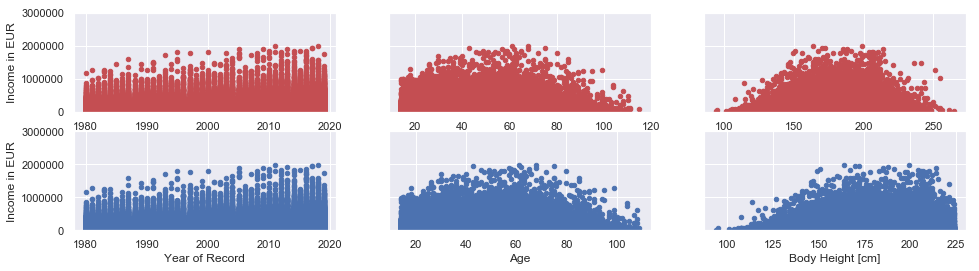

In [23]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['Year of Record','Age','Body Height [cm]']
for i, c in zip(range(3), col_name):
    train_df.plot.scatter(ax=axes[i], x=c, y='Income in EUR', ylim= (0,3000000),sharey=True, colorbar=False, c='r')
    

print(train_df.shape)
train_df = train_df[train_df['Age'] < 110]
train_df = train_df[train_df['Body Height [cm]'] < 225]


print(train_df.shape)

for i, c in zip(range(3,6), col_name):
    train_df.plot.scatter(ax=axes[i], x=c, y='Income in EUR', ylim= (0,3000000), sharey=True, colorbar=False, c='b')

In [24]:
# Since Income values varies a lot and it is skewed. Hence we will try to normalize it from taking its log

yt = np.log(train_df['Income in EUR'])


C:\Users\singh\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\singh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\singh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


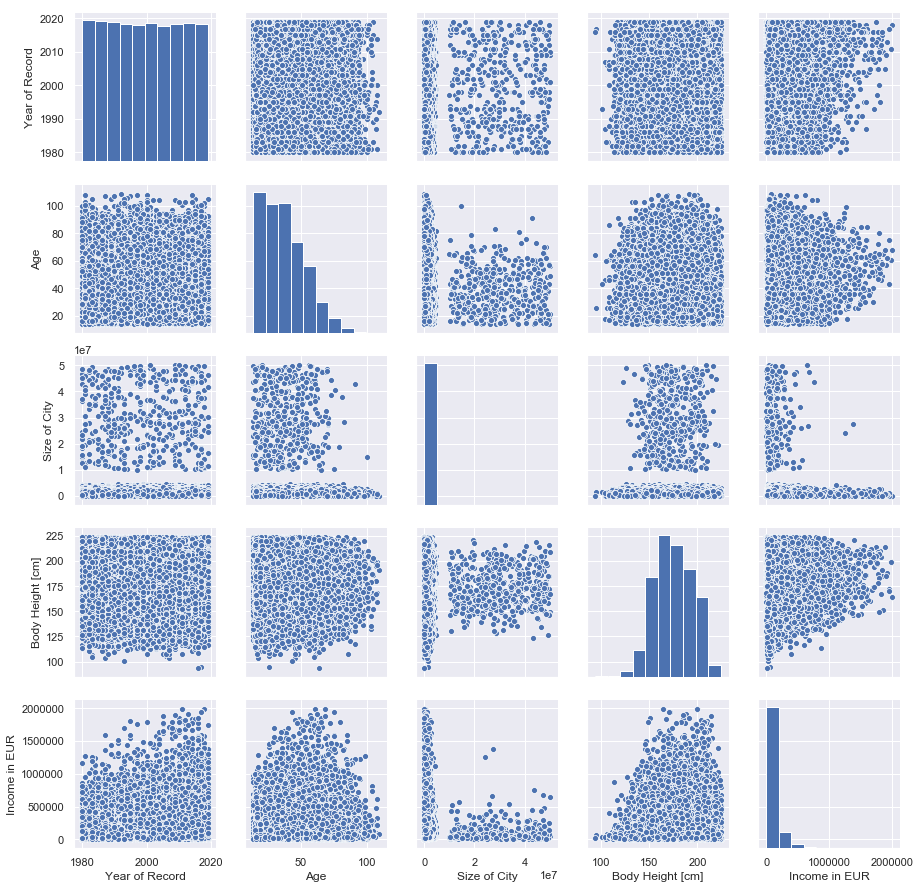

In [26]:
#Lets plot a pairplot for all variables
sns.set()
cols = ['Year of Record', 'Gender', 'Age', 'Country', 'Size of City',
       'Profession', 'University Degree','Hair Color','Body Height [cm]','Income in EUR']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

In [28]:
# there are missing values in both training and testing set. Hence we will take mean values of other values to fill integer values.
train_df = train_df.fillna(train_df.mean())

# We ran this model multiple times to see which features are adding value to the model. Hence we have selected below feature which gives best accuracy so far.


In [34]:
# Just trying on hot coding way
xt_hot= pd.get_dummies(train_df[['Age','Year of Record','Body Height [cm]', 'Country', 'University Degree','Gender']])
test_data = test_df[['Age','Year of Record','Body Height [cm]', 'Country', 'University Degree', 'Gender']]
test_data = pd.get_dummies(test_data)

In [37]:
# There are a lot of countries which differs between test data and training data. Hence we shall pick common features esp. 
#for country column after one hot coding

final_train, final_test = xt_hot.align(test_data, join='inner', axis=1)
final_train.shape

(110719, 164)

In [36]:
# Time to apply linear regression model. I did tested accuracy on lasso and ridge, but all three models giving same accuracy. Hence 
# we will stick to linear model.

from sklearn.model_selection import train_test_split
Xhot_tr, Xhot_ts, Yhot_tr, Yhot_ts = train_test_split(
    final_train, yt, test_size=0.25, random_state = 5)



from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Create linear regression object
lm = linear_model.LinearRegression()


lm.fit(Xhot_tr,Yhot_tr)

y_pred = lm.predict(Xhot_ts)
print('The accuracy of the Linear Regression is',r2_score(Yhot_ts,y_pred))
print ('RMSE is: \n', (mean_squared_error(Yhot_ts,y_pred)))


The accuracy of the Linear Regression is 0.7730634407660858
RMSE is: 
 0.2744125781559666


In [46]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 7, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

clf.fit(Xhot_tr,Yhot_tr)


y_pred = clf.predict(Xhot_ts)

print('The accuracy of the Linear Regression is',r2_score(Yhot_ts,y_pred))
print ('RMSE is: \n', mean_squared_error(Yhot_ts,y_pred))

The accuracy of the Linear Regression is 0.7579320909910922
RMSE is: 
 0.292709465694725


In [40]:
# We shall fix missing values in test data by taking mean values and predict Income for entire test data.

final_test = final_test.fillna(final_test.mean())
pred =lm.predict(final_test)

# Since we have taken log before in training data. Now, we should do reverse to get real Incomes In Euro
actual_predictions = np.exp(pred)

In [42]:
actual_predictions.min()

6928.323864480188

In [43]:
# lets create a dataframe to submit our predictions
submissions =pd.DataFrame({'Instance': test_df['Instance'], 'Income': actual_predictions}, columns =['Instance','Income'])

In [44]:
submissions.count()

Instance    73230
Income      73230
dtype: int64

In [533]:
filename ='tcd ml 2019-20 income prediction submission file.csv'
submissions.to_csv(filename, index=False)
print('Saved File '+ filename)

Saved File tcd ml 2019-20 income prediction submission file.csv
